In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [2]:
string = tf.Variable('This is a sring', tf.string)
number = tf.Variable(32, tf.int16)
float = tf.Variable(56.9, tf.float32)

In [3]:
print(string)

<tf.Variable 'Variable:0' shape=() dtype=string, numpy=b'This is a sring'>


In [4]:
rank_1tensor = tf.Variable(['Rank 1'], tf.string)
rank_2tensor = tf.Variable([['Rank1'], ['Rank2']], tf.string)

In [5]:
rank_1tensor.shape

TensorShape([1])

In [6]:
rank_2tensor.shape

TensorShape([2, 1])

In [7]:
!pip install future

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

In [9]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [10]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [11]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [12]:
dftrain.shape

(627, 9)

<Axes: >

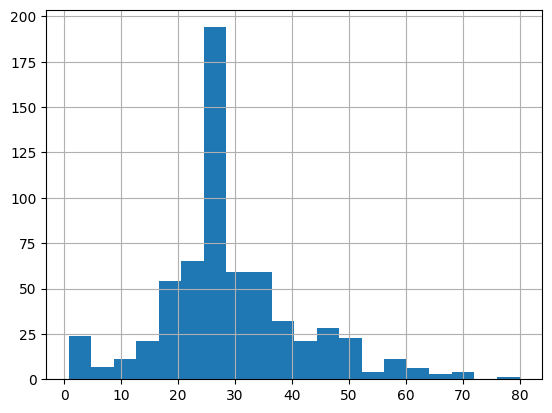

In [13]:
dftrain.age.hist(bins = 20)

<Axes: ylabel='sex'>

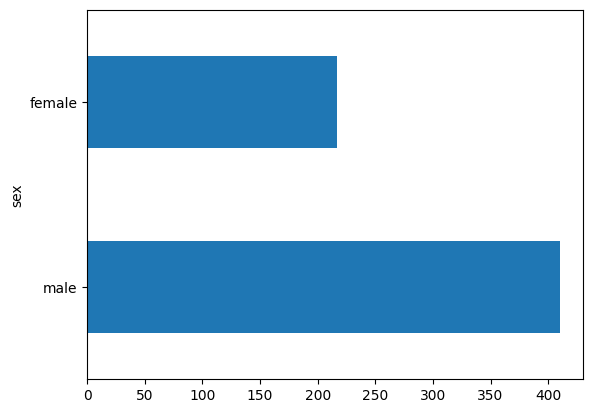

In [14]:
dftrain.sex.value_counts().plot(kind = 'barh')

<Axes: ylabel='class'>

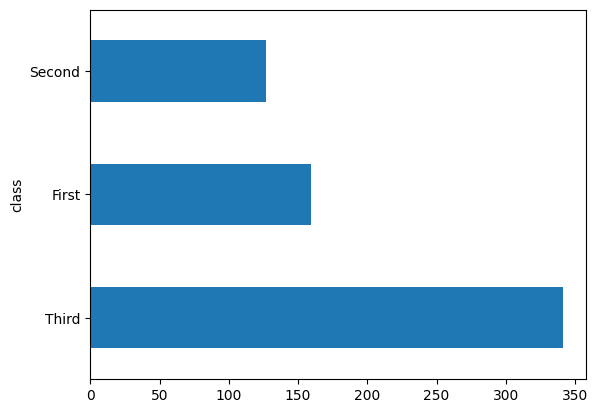

In [15]:
dftrain['class'].value_counts().plot(kind = 'barh')

Text(0.5, 0, 'Survived')

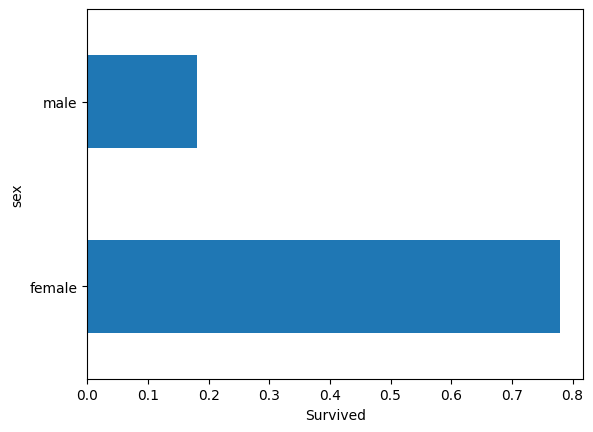

In [16]:
pd.concat([dftrain, y_train], axis = 1).groupby('sex').survived.mean().plot(kind = 'barh').set_xlabel('Survived')

In [17]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']
FEATURE_COLUMNS = []
for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = dftrain[feature_name].unique()
    FEATURE_COLUMNS.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))
for feature_name in NUMERIC_COLUMNS:
    FEATURE_COLUMNS.append(tf.feature_column.numeric_column(feature_name, dtype = tf.float32))

print(FEATURE_COLUMNS)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', 

In [18]:
def make_input_fn(data_df, label_df, num_epochs = 10, batch_size = 32, shuffle = True ):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function
train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs = 1, shuffle = False)

In [21]:
linear_est = tf.estimator.LinearClassifier(feature_columns = FEATURE_COLUMNS)

AttributeError: module 'tensorflow' has no attribute 'estimator'